<a href="https://colab.research.google.com/github/Wanderson23/Machine-Learning/blob/main/Redu%C3%A7%C3%A3o%20de%20Dimensionalidade%20em%20Imagens%20para%20Redes%20Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Importar as bibliotecas necessárias
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive

In [43]:
# Montar o Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Caminho da imagem no Google Drive
caminho_imagem = '/content/drive/MyDrive/road.jpg'  # Substitua pelo caminho correto no seu Drive

In [45]:
# Função para exibir imagem
def mostrar_imagem(imagem, titulo, cmap=None):
    """
    Exibe uma imagem no notebook do Colab.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(imagem, cmap=cmap)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

In [46]:
# Função para converter imagem colorida para tons de cinza

def converter_para_cinza(imagem_colorida):
    """
    Converte uma imagem RGB para tons de cinza usando a fórmula:
    cinza = 0.2989 * R + 0.5870 * G + 0.1140 * B
    """
    matriz_cinza = [0.2989, 0.5870, 0.1140]
    imagem_cinza = np.dot(imagem_colorida[..., :3], matriz_cinza)  # Multiplicação matricial
    return imagem_cinza

In [47]:
# Função para binarizar uma imagem (preto e branco)
def binarizar_imagem(imagem_cinza, limiar=128):
    """
    Converte uma imagem em tons de cinza para preto e branco (binarização).
    Os pixels abaixo do limiar ficam pretos (0) e os acima, brancos (255).
    """
    imagem_binarizada = np.where(imagem_cinza < limiar, 0, 255)
    return imagem_binarizada

In [48]:
# Carregar a imagem do Google Drive
imagem_colorida = np.array(Image.open(caminho_imagem))


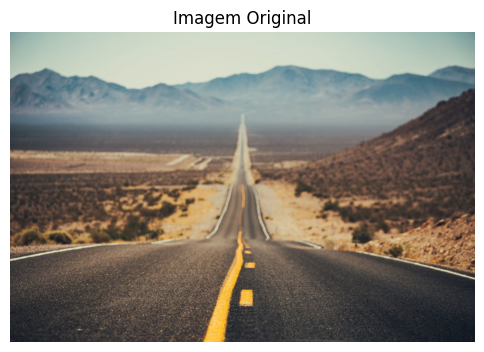

In [49]:
# Mostrar a imagem original
mostrar_imagem(imagem_colorida, "Imagem Original")

In [50]:
# Converter a imagem para tons de cinza
imagem_cinza = converter_para_cinza(imagem_colorida)

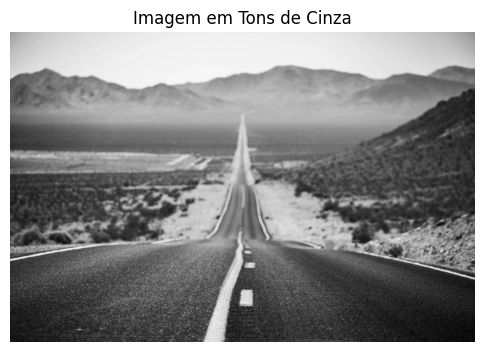

In [51]:
# Mostrar a imagem em tons de cinza
mostrar_imagem(imagem_cinza, "Imagem em Tons de Cinza", cmap='gray')

In [52]:
# Binarizar a imagem usando o resultado da conversão para tons de cinza
imagem_binarizada = binarizar_imagem(imagem_cinza)

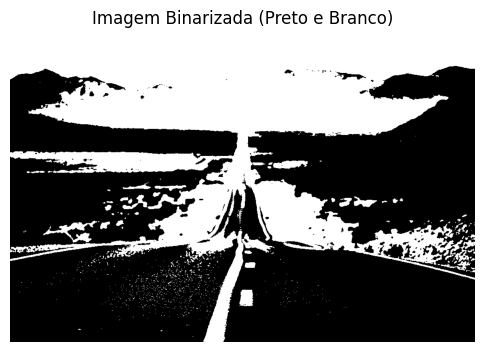

In [53]:
# Mostrar a imagem binarizada
mostrar_imagem(imagem_binarizada, "Imagem Binarizada (Preto e Branco)", cmap='gray')

In [54]:
# Salvar os resultados no Google Drive
caminho_cinza = '/content/drive/MyDrive/imagem_cinza.jpg'
caminho_binarizada = '/content/drive/MyDrive/imagem_binarizada.jpg'

In [55]:
Image.fromarray(imagem_cinza.astype(np.uint8)).save(caminho_cinza)
Image.fromarray(imagem_binarizada.astype(np.uint8)).save(caminho_binarizada)